In [1]:
#add your code 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/2.12_Health_systems.csv')

In [5]:
df.head()

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


In [43]:
# Rename the columns
df2 = df.rename(columns = {'Completeness_of_birth_reg_2009-18': 'Birth_2009-18'
                          ,'Completeness_of_death_reg_2008-16': 'Death_2008-16', 
                           'World_Bank_Name': 'Bank',
                           'Province_State' : 'Province',
                           'Country_Region': 'Region'}, 
                inplace = False)


In [44]:
df2.head()

,Region,Province,Bank,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Birth_2009-18,Death_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


In [92]:
df2['Bank']

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
               ...          
205    Virgin Islands (U.S.)
206       West Bank and Gaza
207              Yemen, Rep.
208                   Zambia
209                 Zimbabwe
Name: Bank, Length: 210, dtype: object

In [88]:
df2.shape

(210, 14)

In [45]:
df2.isnull().sum()

Region                                   23
Province                                196
Bank                                      0
Health_exp_pct_GDP_2016                  24
Health_exp_public_pct_2016               24
Health_exp_out_of_pocket_pct_2016        24
Health_exp_per_capita_USD_2016           24
per_capita_exp_PPP_2016                  24
External_health_exp_pct_2016             43
Physicians_per_1000_2009-18              21
Nurse_midwife_per_1000_2009-18           21
Specialist_surgical_per_1000_2008-18     35
Birth_2009-18                            47
Death_2008-16                           103
dtype: int64

In [46]:
#Prikazhi kolku falat vrednosti i istite da se pokazhat vo procenti
missing_values_df2 = df2.isnull().sum()
percentage_df2 = 100 * df2.isnull().sum() / len(df2)
missing_values_table_df2 = pd.concat([missing_values_df2, percentage_df2], axis=1)
missing_values_table_df2.columns = ['Num. of missing values','% of missing values']
missing_values_table_df2

,Num. of missing values,% of missing values
Region,23,10.952381
Province,196,93.333333
Bank,0,0.000000
Health_exp_pct_GDP_2016,24,11.428571
Health_exp_public_pct_2016,24,11.428571
Health_exp_out_of_pocket_pct_2016,24,11.428571
Health_exp_per_capita_USD_2016,24,11.428571
per_capita_exp_PPP_2016,24,11.428571
External_health_exp_pct_2016,43,20.476190
Physicians_per_1000_2009-18,21,10.000000


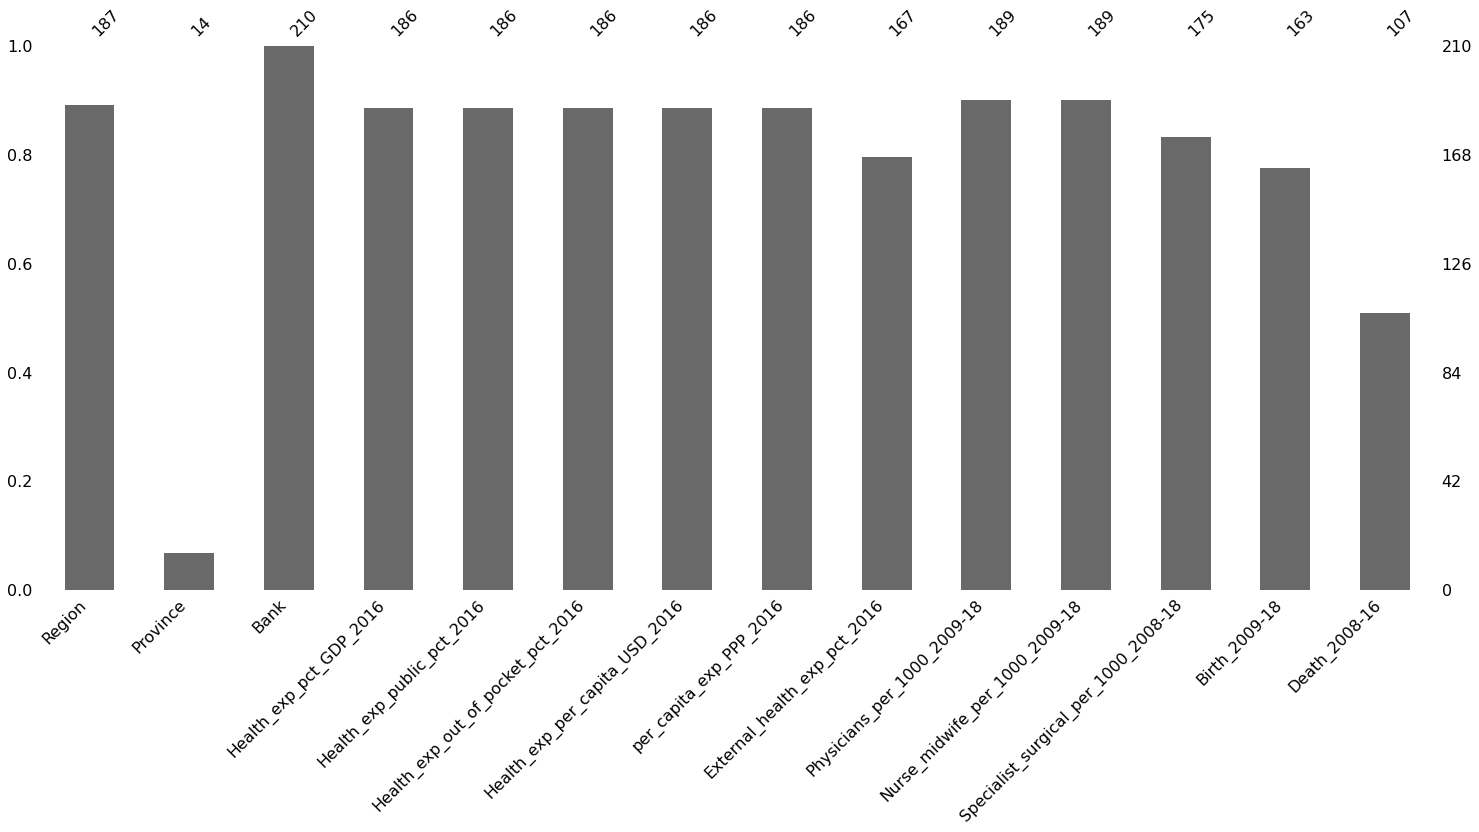

In [70]:
import missingno as msno
msno.bar(df2)

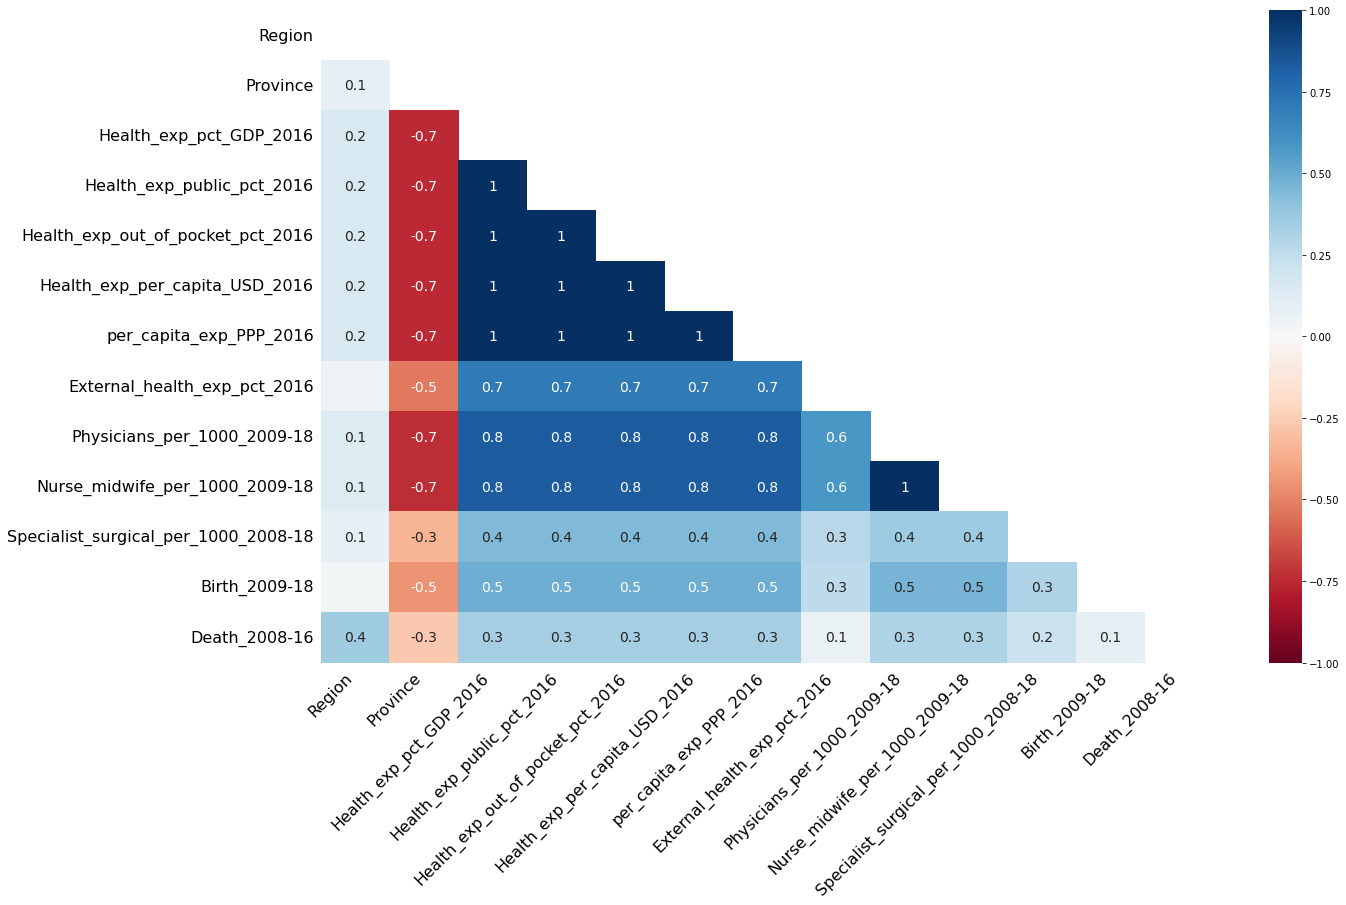

In [73]:
msno.heatmap(df2)

In [211]:
from sklearn.impute import SimpleImputer
finalDS = df2.copy()
main_imputer = SimpleImputer(strategy = 'most_frequent')
finalDS.iloc[:,:] = main_imputer.fit_transform(finalDS)
finalDS.isnull().sum()

Region                                  0
Province                                0
Bank                                    0
Health_exp_pct_GDP_2016                 0
Health_exp_public_pct_2016              0
Health_exp_out_of_pocket_pct_2016       0
Health_exp_per_capita_USD_2016          0
per_capita_exp_PPP_2016                 0
External_health_exp_pct_2016            0
Physicians_per_1000_2009-18             0
Nurse_midwife_per_1000_2009-18          0
Specialist_surgical_per_1000_2008-18    0
Birth_2009-18                           0
Death_2008-16                           0
dtype: int64

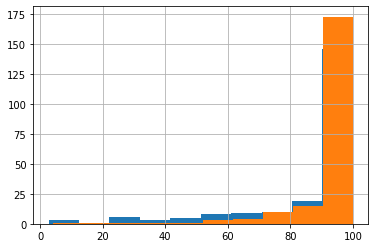

In [212]:
finalDS['Birth_2009-18'].hist(bins = 10)
finalDS['Death_2008-16'].hist(bins = 10)

In [213]:
# Tochka 3:
#Kje napravam chetiri modeli, 
#Dense
#Konvulaciski
#Kombinacija od Dense i Konvulaciski
#XGBoost

In [214]:
finalDS.head()

,Region,Province,Bank,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Birth_2009-18,Death_2008-16
0,Afghanistan,Cayman Islands,0,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,100.0
1,Albania,Cayman Islands,1,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,Cayman Islands,2,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,100.0
3,Andorra,Cayman Islands,3,10.4,49.1,41.7,3834.7,4978.7,0.0,3.3,4.0,83.1,100.0,80.0
4,Angola,Cayman Islands,4,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,0.4,25.0,100.0


In [215]:
target_column = finalDS['Bank'].copy()

In [216]:
finalDS.drop(['Bank'],axis=1,inplace=True)

In [217]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
target_column= le.fit_transform(target_column) 

In [218]:
finalDS['Region'] = le.fit_transform(finalDS['Region'])

In [219]:
finalDS['Province'] = le.fit_transform(finalDS['Province'])

In [220]:
finalDS.head()

,Region,Province,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Birth_2009-18,Death_2008-16
0,0,0,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,100.0
1,1,0,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,2,0,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,100.0
3,3,0,10.4,49.1,41.7,3834.7,4978.7,0.0,3.3,4.0,83.1,100.0,80.0
4,4,0,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,0.4,25.0,100.0


In [221]:
# Podelba po mnozhestva na train i test
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(finalDS, 
                                                  target_column, 
                                                  random_state=42
                                                  ) 

In [238]:
from keras.layers import LSTM
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM, Flatten, Dropout
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [223]:
#PRV MODEL
#Dense model
model = Sequential()
model.add(Dense(16, input_dim=13, kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(8,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(8,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(1, kernel_initializer = 'uniform',activation='softmax'))

In [224]:
X_train.shape

(157, 13)

In [225]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [226]:
model.fit(X_train, Y_train, epochs=5, batch_size=10, verbose=1)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0064
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0064
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0064
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0064
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0064


In [227]:
# Tochnost na modelot
_, accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0064
Accuracy: 0.64


In [228]:
# VTOR MODEL
# Konvulaciski

K.clear_session()
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))    
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

In [229]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [230]:
model_history = model.fit(X_train, Y_train,  epochs=10, batch_size=128, verbose=2 )

Epoch 1/10


ValueError: ignored

In [ ]:
##TREBA DA SE DOSREDI ZA VTOR MODEL!

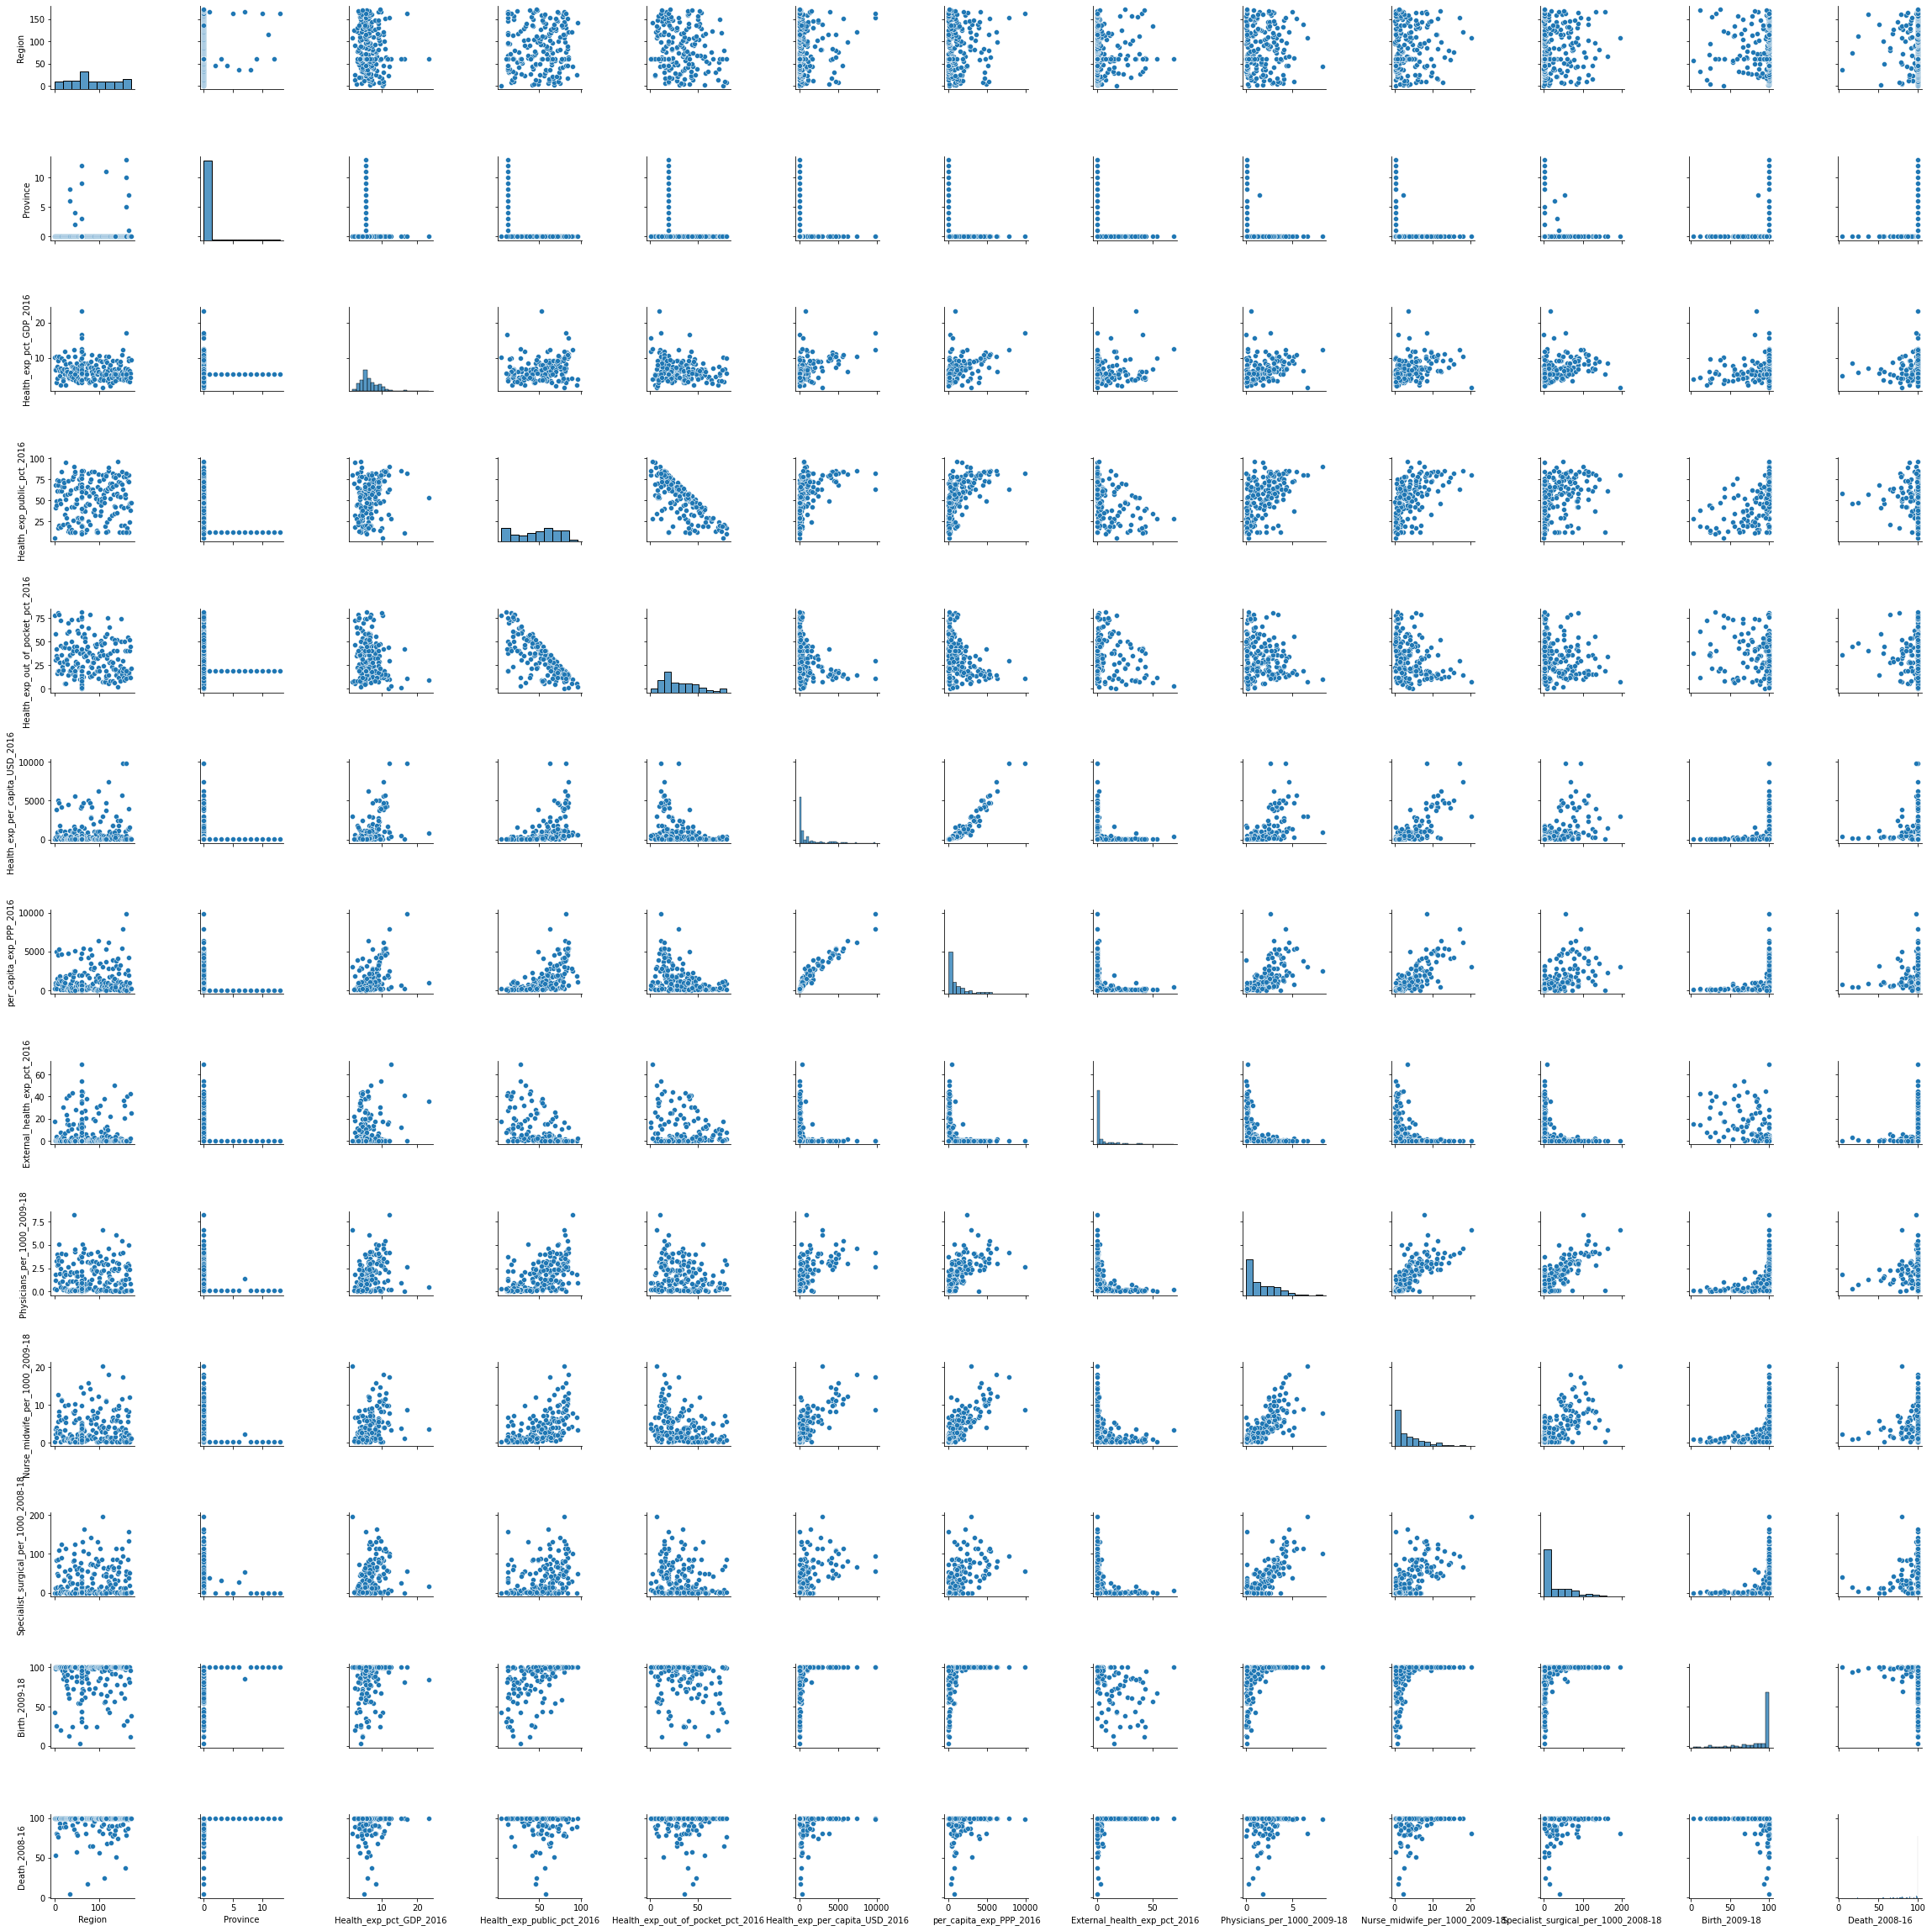

In [231]:
#TRET MODEL
#XGBoost
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.pairplot(finalDS)

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( finalDS[finalDS.columns[:-1]],  finalDS['Province'], test_size=0.2)

In [233]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,n_jobs=-1 , verbose=2,learning_rate=0.16)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [234]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9285714285714286


In [241]:
#CHETVORTI MODEL
#Kombinacija od Dense i Konvulaciski

model = Sequential()
model.add(Conv1D(filters=128, kernel_size=1, padding='causal', activation='relu'))
model.add(MaxPooling1D(pool_size=64))
model.add(Dropout(0.2, input_shape=(64,)))
model.add(Dense(8,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(8,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(2, kernel_initializer = 'uniform',activation='sigmoid'))

In [237]:
finalDS.head()

,Region,Province,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Birth_2009-18,Death_2008-16
0,0,0,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,100.0
1,1,0,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,2,0,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,100.0
3,3,0,10.4,49.1,41.7,3834.7,4978.7,0.0,3.3,4.0,83.1,100.0,80.0
4,4,0,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,0.4,25.0,100.0


In [244]:
y = pd.get_dummies(finalDS['Province']).values

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,df.columns != 'Province'],y,test_size=.2)

In [246]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [248]:
model.fit(X_train, Y_train, epochs=5, batch_size=16)

ValueError: ignored